We're going to import the RI public payroll dataset and do a little exploration.

In [1]:
import pandas as pd
import numpy as np

RI_data = pd.read_csv('RIpayroll_export_2018-04-30_08-19.csv', error_bad_lines=False)

# data tokenization is messy - issues with some (~550) rows requiring extra columns due to bad data quality. 
# For the moment just going to discard these.

b'Skipping line 7272: expected 13 fields, saw 14\nSkipping line 7279: expected 13 fields, saw 14\nSkipping line 7289: expected 13 fields, saw 14\nSkipping line 7300: expected 13 fields, saw 14\nSkipping line 7318: expected 13 fields, saw 14\nSkipping line 7413: expected 13 fields, saw 15\nSkipping line 7432: expected 13 fields, saw 14\nSkipping line 7433: expected 13 fields, saw 14\nSkipping line 7448: expected 13 fields, saw 14\nSkipping line 7470: expected 13 fields, saw 14\nSkipping line 7486: expected 13 fields, saw 14\nSkipping line 7539: expected 13 fields, saw 15\nSkipping line 7563: expected 13 fields, saw 14\nSkipping line 7573: expected 13 fields, saw 14\nSkipping line 7575: expected 13 fields, saw 14\nSkipping line 7579: expected 13 fields, saw 14\nSkipping line 7586: expected 13 fields, saw 14\nSkipping line 7599: expected 13 fields, saw 14\nSkipping line 7614: expected 13 fields, saw 14\nSkipping line 7655: expected 13 fields, saw 14\nSkipping line 7732: expected 13 fields

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
RI_data.head()


,fiscal_year,last,first,m,department,title,regular,overtime,other,total,annual,termination,
0,2016,TOBEY,JAMES,A,U R I,NON CLASSIFIED,94392.28,0.00,638.76,95031.04,95031.04,,
1,2016,TOBEY,STEPHANIE,A,U R I,NON CLASSIFIED,3576.93,0.00,0.00,3576.93,62000.12,,
2,2016,TISDALE,JACQUELINE,M,U R I,NON CLASSIFIED,54243.32,0.00,362.10,54605.42,56000.1,,
3,2016,TIMPSON JR,DONALD,R,U R I,SR GARDENER,45509.76,4900.29,296.95,50707.00,45751.68,,
4,2016,TINER,JACQUELINE,N,U R I,HUMAN RESOURCES ANALYST I,68550.08,0.00,1001.00,69551.08,68904.42,,


Compare how department mean annual salary changes over fiscal year. Drop the middle initial column, it doesn't seem very useful.

In [3]:
# RI_data.columns
# RI_data = RI_data.drop(' m', axis=1)

years = np.sort( RI_data['fiscal_year'].unique() ) # get years
init_years = range(2016,2019) # extracted years to work with for initial exploration
departments = RI_data[' department'].unique() # get departments

means = np.pi * np.ones(shape = [len(departments), len(init_years) + 1]) # initialize matrix of means 
                                                                         # (columns are years for fixed dept)
                                                                         # len(init_years) + 1 to add a row index
for i in range(len(departments)):
    means[i,0] = i
    
for i in range(len(departments)):
    for j in range(len(init_years)):
        subset = RI_data.loc[ (RI_data['fiscal_year'] == init_years[j]) & (RI_data[' department'] == departments[i] ) ]
        means[i,j+1] = np.mean( [ float(x) for x in subset[' annual'] ] ) # annual salary type = string

# means        

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
# clean 49x3 matrix a little
# 7 rows: 7,8,32,42,47,48,49 have nan in at least one year
means = means[~np.isnan(means).any(axis=1)] # loses structure

print(means.shape) 
# even without spending a lot of time cleaning
# we have good data for average salary of 42 different departments over three years

(42, 4)


In [5]:
departments # list of departments

array([' U R I', ' TREASURY', ' TRANSPORTATION', ' STATE COLLEGES',
       ' SECRETARY OF STATE', ' RI COUNCIL ON THE ARTS', ' RIHEAA',
       ' REVENUE', ' R I ETHICS COMMISSION', ' R I COLLEGE',
       ' PUBLIC UTILITIES', ' PUBLIC SAFETY', ' LEGISLATIVE',
       ' ADMINISTRATION', ' ATOMIC ENERGY COMMISSION', ' ATTORNEY GENERAL',
       ' BHDDH', ' BOARD OF ELECTIONS', ' BUSINESS REGULATIONS',
       ' C.R.M.C.', ' CHILD ADVOCATE', ' CHILDREN & FAMILIES',
       ' COMM ON DEAF/HEARING', ' COMM.ON DISABILITIES',
       ' COMMISSION HUMAN RIGHTS', ' COMMUNITY COLLEGE OF R I',
       ' CORRECTIONS', ' DEM', ' DEPT OF REVENUE', ' HUMAN SERVICES',
       ' DLT', ' EDUCATION', ' ELDERLY AFFAIRS', ' GOVERNORS OFFICE',
       ' HEALTH', ' HEALTH AND HUMAN SERVICES', ' HIGHER EDUCATION',
       ' HISTORICAL PRESERVATION', ' LIEUTENANT GOVERNOR',
       ' MENTAL HEALTH ADVOCATE', ' MILITARY STAFF', ' PUBLIC DEFENDER',
       ' PUBLIC TELECOMM AUTH', ' JUDICIAL', ' EMERGENCY MANAGEMENT',
     

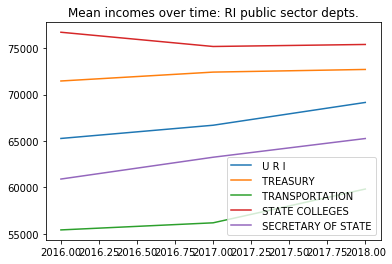

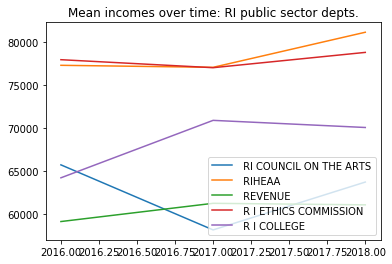

In [6]:
# Average incomes over time for various departments
# Also of interest: compare change in staffing counts over time

import matplotlib.pyplot as pplot

for j in range(2):
    for i in range(5):
        pplot.plot(init_years, means[i + 5*j, 1:len(init_years)+1], label = departments[i + 5*j])
        pplot.title("Mean incomes over time: RI public sector depts.")
        pplot.legend(loc='lower right')
    pplot.show()



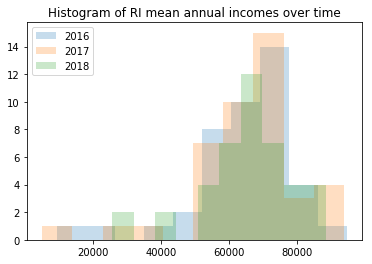

In [7]:
# histogram


for j in range(len(init_years)):
    pplot.hist( means[0:,j+1], alpha= .25, label = str(init_years[j]) ) 
    # comparison of mean annual incomes over 'TREASURY' 
    pplot.title("Histogram of RI mean annual incomes over time")
    pplot.legend(loc='upper left')

pplot.show()

Above we construct histograms of the various department mean annual incomes, over time.